In [249]:
from plotnine import ggplot, aes, geom_point, geom_line, geom_linerange, ylim, scale_y_continuous
import numpy as np
import pandas as pd
from scipy.stats import uniform, bernoulli, norm

Create test data

In [226]:
np.random.seed(1)

def logistic(x, k, x0):
    return 1 / (1 + np.exp(-k*(x - x0)))

n0s = 20
n1s = 20
steepness = 3
x_offset = 2.5

df = pd.DataFrame({
    'x': np.concatenate((
        uniform.rvs(loc=0, scale=3, size=n0s),
        uniform.rvs(loc=2, scale=3, size=n1s),
    )),
    # 'x': uniform.rvs(loc=0, scale=5, size=n0s+n1s),
    'y_true': np.concatenate((
        [0] * n0s,
        [1] * n1s,
    ))
})
df['px_model'] = logistic(df['x'], steepness, x_offset, )
df['y'] = bernoulli.rvs(df['px_model'])
df

,x,y_true,px_model,y
0,1.251066,0,0.023049,1
1,2.160973,0,0.265597,1
2,0.000343,0,0.000553,0
3,0.906998,0,0.008334,0
4,0.440268,0,0.002068,0
5,0.277016,0,0.001268,0
6,0.558781,0,0.002948,0
7,1.036682,0,0.012249,0
8,1.190302,0,0.019282,0
9,1.616450,0,0.065949,0


In [227]:
x = np.linspace(0, 5, 100)
px_df = pd.DataFrame({
    'x': x,
    'y': logistic(x, steepness, x_offset)
})

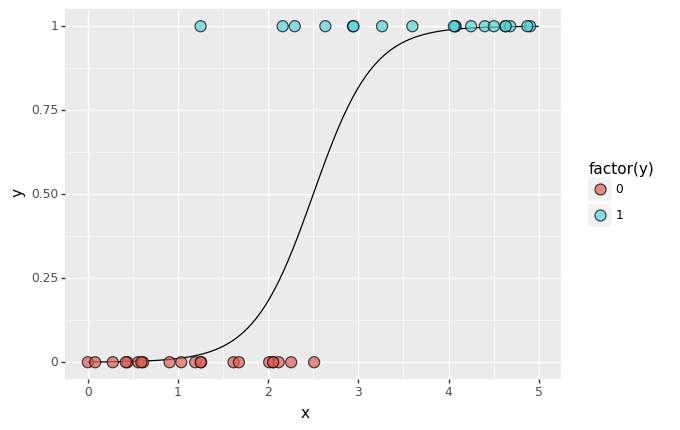

<ggplot: (8764784478022)>

In [228]:
(
    ggplot(df, aes('x', 'y'))
    + geom_line(data=px_df)
    + geom_point(size=4, shape='o', alpha=0.7, mapping=aes(fill='factor(y)'))
)

Define probability of y = 1:

$$
p(x) = \frac{1}{1 + e^{\beta_1 x + \beta_0}}
$$ 

We can fit the points to log-probabilities. For y = 1 we are fitting the points to:

$$
-\log p(x) = -\log\frac{1}{1 + e^{\beta_1 x + \beta_0}} = \log\left( 1 + e^{\beta_1 x + \beta_0}\right)
$$

And for y = 0, we are fitting the points to:

$$
\begin{align}
 -\log\left[1 - p(x)\right] & = -\log\left(1 - \frac{1}{1 + e^{\beta_1 x + \beta_0}}\right) \\
 & = -\log\left(
    \frac{1 + e^{\beta_1 x + \beta_0}}{1 + e^{\beta_1 x + \beta_0}} - 
    \frac{1}{1 + e^{\beta_1 x + \beta_0}}
    \right) \\
 & = -\log\frac{e^{\beta_1 x + \beta_0}}{1 + e^{\beta_1 x + \beta_0}} \\
 & = -\log\frac{1}{1 + e^{-(\beta_1 x + \beta_0)}} \\
 & = \log\left(1 + e^{-(\beta_1 x + \beta_0)}\right)
\end{align}
$$

In [229]:
def log_loss(p_x, y):
    return -y * np.log(p_x) - (1 - y) * np.log(1 - p_x)

Total log-loss:  12.999413101903455


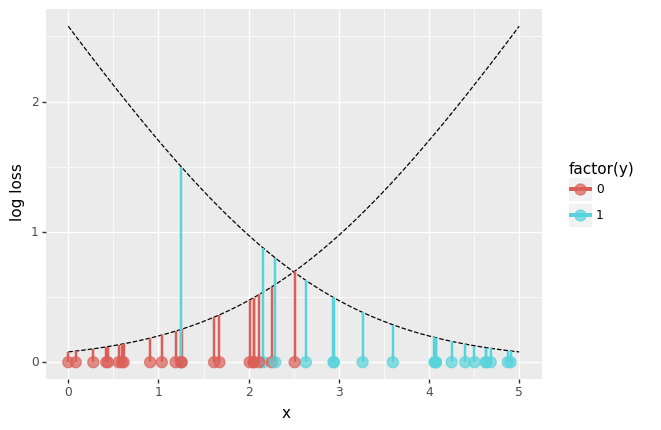

<ggplot: (8764782746344)>

In [252]:
# steepness = 3
# x_offset = 2.5

beta1 = 1
beta0 = 2.5

px = logistic(x, beta1, beta0)

df['px'] = logistic(df['x'], beta1, beta0)
df['log_loss'] = log_loss(df['px'], df['y'])

print('Total log-loss: ', np.sum(df['log_loss']))

log_loss_df = pd.DataFrame({
    'x': x,
    'log_loss_0': log_loss(px, y=0),
    'log_loss_1': log_loss(px, y=1),
})

(
    ggplot(df, aes('x', 0, color='factor(y)', fill='factor(y)'))
    + geom_line(data=log_loss_df, mapping=aes('x', 'log_loss_0'), inherit_aes=False, linetype='dashed')
    + geom_line(data=log_loss_df, mapping=aes('x', 'log_loss_1'), inherit_aes=False, linetype='dashed')
    + geom_linerange(mapping=aes(ymin=0, ymax='log_loss'), size=1)
    + geom_point(size=4, shape='o', alpha=0.7)
    + scale_y_continuous(name='log loss')
    # + ylim(0, 5)
)